In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

In [3]:
#define fontsize
fontsize = 17
figsize = (8,4)

# Configure parameters
plt.rcParams.update({'font.size': fontsize, 'figure.figsize': figsize})

# Set default tick and axes properties
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 4
plt.rcParams['ytick.major.width'] = 4
plt.rcParams['xtick.minor.size'] = 6
plt.rcParams['ytick.minor.size'] = 6
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.minor.width'] = 2
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.linewidth'] = 3

In [4]:
df_events1 = pd.read_csv('event-versions.csv') # load the event versions data with pandas
df_events2 = pd.read_csv('events.csv') # load the event data with pandas
df_events3 = pd.read_csv('events (1).csv') # corrected file path
df_events4 = pd.read_csv('events (2).csv')


In [5]:
df_events= pd.concat([df_events1, df_events2, df_events3, df_events4], ignore_index=True) # concatenate the dataframes
df_events

,name,shortName,gps,version,catalog,doi,detail_url,mass_1_source,mass_1_source_lower,mass_1_source_upper,...,redshift_upper,far,far_lower,far_upper,p_astro,p_astro_lower,p_astro_upper,final_mass_source,final_mass_source_lower,final_mass_source_upper
0,GW230529_181500,GW230529_181500-v1,1.369419e+09,1,O4_Discovery_Papers,https://doi.org/10.7935/6k89-7q62,http://gwosc.org/api/v2/event-versions/GW23052...,3.6,-1.2,0.8,...,0.02,0.00100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GW200322_091133,GW200322_091133-v1,1.268904e+09,1,GWTC-3-confident,https://doi.org/10.7935/b024-1886,http://gwosc.org/api/v2/event-versions/GW20032...,38.0,-22.0,130.0,...,1.43,140.00000,NaN,NaN,0.61501,NaN,NaN,48.0,-22.0,132.0
2,GW200316_215756,GW200316_215756-v1,1.268431e+09,1,GWTC-3-confident,https://doi.org/10.7935/b024-1886,http://gwosc.org/api/v2/event-versions/GW20031...,13.1,-2.9,10.2,...,0.08,0.00001,NaN,NaN,0.99000,NaN,NaN,20.2,-1.9,7.4
3,GW200311_115853,GW200311_115853-v1,1.267963e+09,1,GWTC-3-confident,https://doi.org/10.7935/b024-1886,http://gwosc.org/api/v2/event-versions/GW20031...,34.2,-3.8,6.4,...,0.05,0.00001,NaN,NaN,0.99000,NaN,NaN,59.0,-3.9,4.8
4,GW200311_103121,200311_103121-v1,1.267958e+09,1,GWTC-3-marginal,https://doi.org/10.7935/b024-1886,http://gwosc.org/api/v2/event-versions/GW20031...,NaN,NaN,NaN,...,NaN,1.30000,NaN,NaN,0.19400,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,GW191126_115259,GW191126_115259-v1,1.258804e+09,1,GWTC-3-confident,https://doi.org/10.7935/b024-1886,https://gwosc.org/api/v2/event-versions/GW1911...,12.1,-2.2,5.5,...,0.12,3.20000,NaN,NaN,0.70041,NaN,NaN,19.6,-2.0,3.5
268,GW191113_071753,GW191113_071753-v1,1.257665e+09,1,GWTC-3-confident,https://doi.org/10.7935/b024-1886,https://gwosc.org/api/v2/event-versions/GW1911...,29.0,-14.0,12.0,...,0.18,26.00000,NaN,NaN,0.68339,NaN,NaN,34.0,-10.0,11.0
269,GW191109_010717,GW191109_010717-v1,1.257297e+09,1,GWTC-3-confident,https://doi.org/10.7935/b024-1886,https://gwosc.org/api/v2/event-versions/GW1911...,65.0,-11.0,11.0,...,0.18,0.00018,NaN,NaN,0.99000,NaN,NaN,107.0,-15.0,18.0
270,GW191105_143521,GW191105_143521-v1,1.257000e+09,1,GWTC-3-confident,https://doi.org/10.7935/b024-1886,https://gwosc.org/api/v2/event-versions/GW1911...,10.7,-1.6,3.7,...,0.07,0.01200,NaN,NaN,0.99000,NaN,NaN,17.6,-1.2,2.1


In [6]:
def classify_merger(row):
    '''Classifiing merger types based on the 2 mass sources'''
    #define mass ranges
    NS_range = (1.1, 2.5) #neutron star mass range, 1.1-2.5 because some sources say 2 solar masses and others say 3 solar masses
    BH_range = 5 #balk Hole mass range is roughly 5 solar masses and up

    mass1, mass2 = row['mass_1_source'], row['mass_2_source']
    if NS_range[0] <= mass1 <= NS_range[1] and NS_range[0] <= mass2 <= NS_range[1]:
        return 'NS-NS'
    elif (NS_range[0] <= mass1 <= NS_range[1] and mass2 >= BH_range) or (NS_range[0] <= mass2 <= NS_range[1] and mass1 >= BH_range):
        return 'NS-BH'
    elif mass1 >= BH_range and mass2 >= BH_range:
        return 'BH-BH'
    else:
        return 'Unknown'

In [7]:
# Ensure the required columns 'mass_1_source' and 'mass_2_source' exist in the dataframe
if 'mass_1_source' in df_events.columns and 'mass_2_source' in df_events.columns:
    df_events['merger_type'] = df_events.apply(classify_merger, axis=1)
else:
    print("Required columns 'mass_1_source' and 'mass_2_source' are missing in the dataframe.")


In [8]:
columns_to_display = ['mass_1_source', 'mass_2_source','final_mass_source', 'merger_type']

# Filter the dataframe for NS-NS mergers
NS_NS_mergers = df_events[df_events['merger_type'] == 'NS-NS']

# DataFrame for NS-NS mergers
organized_df_2NS = NS_NS_mergers[columns_to_display]
print(organized_df_2NS)

     mass_1_source  mass_2_source  final_mass_source merger_type
125           1.74           1.56                NaN       NS-NS
126           2.00           1.40                NaN       NS-NS
127           2.10           1.30                NaN       NS-NS
147           1.46           1.27                2.8       NS-NS
184           1.46           1.27                2.8       NS-NS
230           2.10           1.30                NaN       NS-NS


In [9]:
# Filter the DataFrame for NS-BH mergers
NS_BH_mergers = df_events[df_events['merger_type'] == 'NS-BH']

# DataFrame for NS-BH mergers
organized_df_NS_BH = NS_BH_mergers[columns_to_display]
print(organized_df_NS_BH)

     mass_1_source  mass_2_source  final_mass_source merger_type
26             5.7           1.50                NaN       NS-BH
27             5.9           1.44                7.2       NS-BH
30             8.9           1.90                NaN       NS-BH
31             9.1           1.91               10.8       NS-BH
36            31.1           1.17               32.2       NS-BH
58             9.7           2.10               11.6       NS-BH
123            5.7           1.50                NaN       NS-BH
198            9.7           2.10               11.6       NS-BH
256            5.9           1.44                7.2       NS-BH
260           31.1           1.17               32.2       NS-BH


In [10]:
# Filter the DataFrame for BH-BH mergers
BH_BH_mergers = df_events[df_events['merger_type'] == 'BH-BH']

# DataFrame for BH-BH mergers
organized_df_BH_BH = BH_BH_mergers[columns_to_display]
print(organized_df_BH_BH)

     mass_1_source  mass_2_source  final_mass_source merger_type
1             38.0           11.3               48.0       BH-BH
2             13.1            7.8               20.2       BH-BH
3             34.2           27.7               59.0       BH-BH
5             60.0           24.0               88.0       BH-BH
6             28.3           14.8               41.7       BH-BH
..             ...            ...                ...         ...
267           12.1            8.3               19.6       BH-BH
268           29.0            5.9               34.0       BH-BH
269           65.0           47.0              107.0       BH-BH
270           10.7            7.7               17.6       BH-BH
271           11.8            7.9               19.0       BH-BH

[204 rows x 4 columns]


In [11]:
df_events = pd.merge(df_events, pd.concat([NS_NS_mergers, NS_BH_mergers, BH_BH_mergers]), how='left')
df_events

,name,shortName,gps,version,catalog,doi,detail_url,mass_1_source,mass_1_source_lower,mass_1_source_upper,...,far,far_lower,far_upper,p_astro,p_astro_lower,p_astro_upper,final_mass_source,final_mass_source_lower,final_mass_source_upper,merger_type
0,GW230529_181500,GW230529_181500-v1,1.369419e+09,1,O4_Discovery_Papers,https://doi.org/10.7935/6k89-7q62,http://gwosc.org/api/v2/event-versions/GW23052...,3.6,-1.2,0.8,...,0.00100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
1,GW200322_091133,GW200322_091133-v1,1.268904e+09,1,GWTC-3-confident,https://doi.org/10.7935/b024-1886,http://gwosc.org/api/v2/event-versions/GW20032...,38.0,-22.0,130.0,...,140.00000,NaN,NaN,0.61501,NaN,NaN,48.0,-22.0,132.0,BH-BH
2,GW200316_215756,GW200316_215756-v1,1.268431e+09,1,GWTC-3-confident,https://doi.org/10.7935/b024-1886,http://gwosc.org/api/v2/event-versions/GW20031...,13.1,-2.9,10.2,...,0.00001,NaN,NaN,0.99000,NaN,NaN,20.2,-1.9,7.4,BH-BH
3,GW200311_115853,GW200311_115853-v1,1.267963e+09,1,GWTC-3-confident,https://doi.org/10.7935/b024-1886,http://gwosc.org/api/v2/event-versions/GW20031...,34.2,-3.8,6.4,...,0.00001,NaN,NaN,0.99000,NaN,NaN,59.0,-3.9,4.8,BH-BH
4,GW200311_103121,200311_103121-v1,1.267958e+09,1,GWTC-3-marginal,https://doi.org/10.7935/b024-1886,http://gwosc.org/api/v2/event-versions/GW20031...,NaN,NaN,NaN,...,1.30000,NaN,NaN,0.19400,NaN,NaN,NaN,NaN,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,GW191126_115259,GW191126_115259-v1,1.258804e+09,1,GWTC-3-confident,https://doi.org/10.7935/b024-1886,https://gwosc.org/api/v2/event-versions/GW1911...,12.1,-2.2,5.5,...,3.20000,NaN,NaN,0.70041,NaN,NaN,19.6,-2.0,3.5,BH-BH
268,GW191113_071753,GW191113_071753-v1,1.257665e+09,1,GWTC-3-confident,https://doi.org/10.7935/b024-1886,https://gwosc.org/api/v2/event-versions/GW1911...,29.0,-14.0,12.0,...,26.00000,NaN,NaN,0.68339,NaN,NaN,34.0,-10.0,11.0,BH-BH
269,GW191109_010717,GW191109_010717-v1,1.257297e+09,1,GWTC-3-confident,https://doi.org/10.7935/b024-1886,https://gwosc.org/api/v2/event-versions/GW1911...,65.0,-11.0,11.0,...,0.00018,NaN,NaN,0.99000,NaN,NaN,107.0,-15.0,18.0,BH-BH
270,GW191105_143521,GW191105_143521-v1,1.257000e+09,1,GWTC-3-confident,https://doi.org/10.7935/b024-1886,https://gwosc.org/api/v2/event-versions/GW1911...,10.7,-1.6,3.7,...,0.01200,NaN,NaN,0.99000,NaN,NaN,17.6,-1.2,2.1,BH-BH


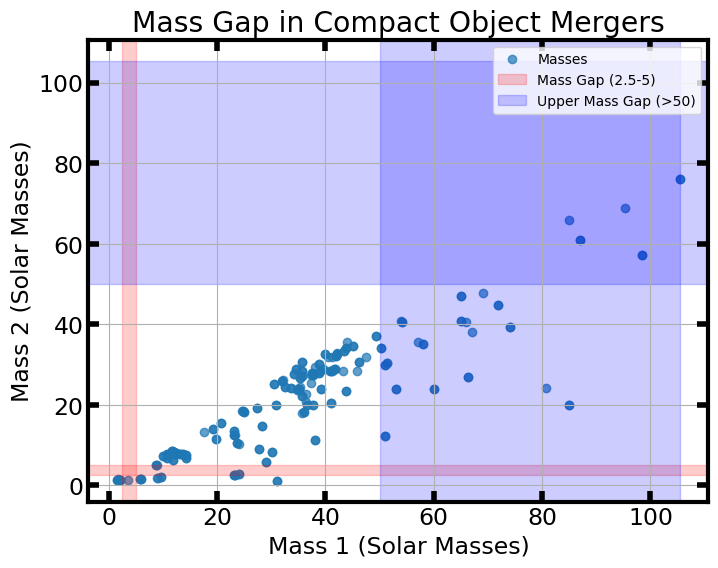

In [12]:
import matplotlib.pyplot as plt

def plot_mass_gap(df_events):
    # Extract masses
    mass1 = df_events['mass_1_source']
    mass2 = df_events['mass_2_source']

    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(mass1, mass2, alpha=0.7, label='Masses')

    # Highlight the mass gap region
    plt.axvspan(2.5, 5, color='red', alpha=0.2, label='Mass Gap (2.5-5)')
    plt.axhspan(2.5, 5, color='red', alpha=0.2)

    # Highlight the upper mass gap region (e.g., masses > 50 solar masses)
    upper_mass_threshold = 50
    plt.axvspan(upper_mass_threshold, max(mass1.max(), mass2.max()), color='blue', alpha=0.2, label='Upper Mass Gap (>50)')
    plt.axhspan(upper_mass_threshold, max(mass1.max(), mass2.max()), color='blue', alpha=0.2)

    # Add labels and legend
    plt.xlabel('Mass 1 (Solar Masses)')
    plt.ylabel('Mass 2 (Solar Masses)')
    plt.title('Mass Gap in Compact Object Mergers')
    plt.legend(fontsize=10)
    plt.grid(True)

    # Show the plot
    plt.show()

# Call the function with df_events
plot_mass_gap(df_events)

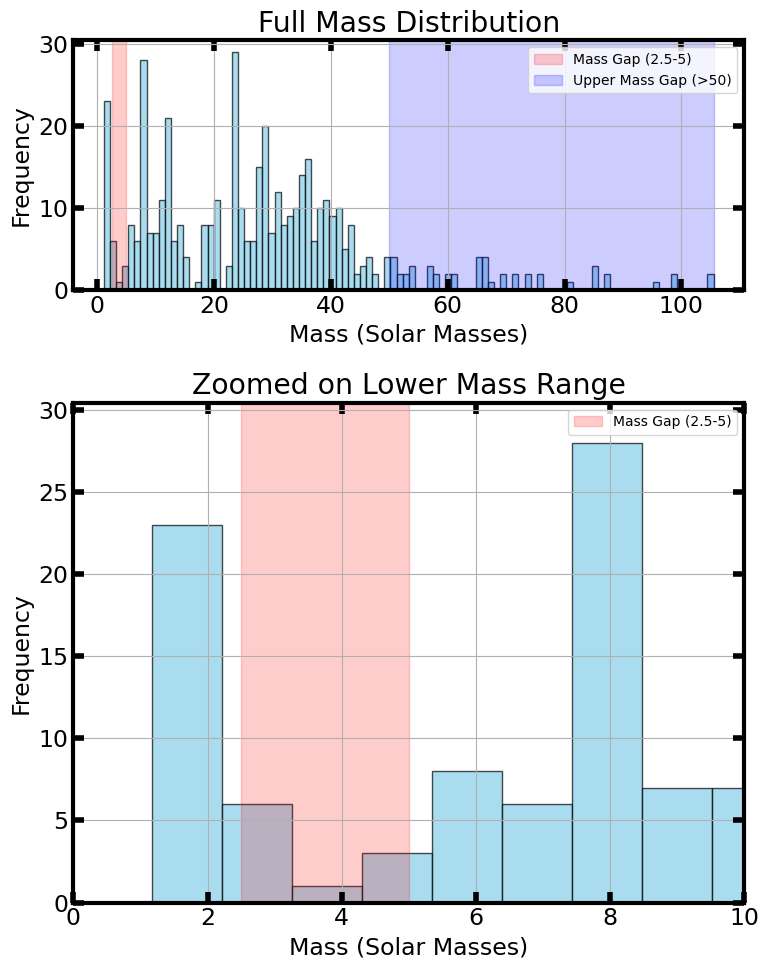

In [13]:
def plot_mass_histogram_with_subplots(df_events):
    # Combine both masses into one series
    all_masses = pd.concat([df_events['mass_1_source'], df_events['mass_2_source']])

    # Create subplots
    fig, axes = plt.subplots(2, 1, figsize=(8, 10), gridspec_kw={'height_ratios': [1, 2]})

    # Full histogram
    axes[0].hist(all_masses, bins=100, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0].axvspan(2.5, 5, color='red', alpha=0.2, label='Mass Gap (2.5-5)')
    axes[0].axvspan(50, all_masses.max(), color='blue', alpha=0.2, label='Upper Mass Gap (>50)')
    axes[0].set_title('Full Mass Distribution')
    axes[0].set_xlabel('Mass (Solar Masses)')
    axes[0].set_ylabel('Frequency')
    axes[0].legend(fontsize=10)
    axes[0].grid(True)

    # Zoomed-in histogram
    axes[1].hist(all_masses, bins=100, color='skyblue', edgecolor='black', alpha=0.7)
    axes[1].axvspan(2.5, 5, color='red', alpha=0.2, label='Mass Gap (2.5-5)')
    axes[1].set_xlim(0, 10)
    axes[1].set_title('Zoomed on Lower Mass Range')
    axes[1].set_xlabel('Mass (Solar Masses)')
    axes[1].set_ylabel('Frequency')
    axes[1].legend(fontsize=10)
    axes[1].grid(True)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Call the function with df_events
plot_mass_histogram_with_subplots(df_events)

In [14]:
def chirp(df_events):
    mass1 = df_events['mass_1_source']
    mass2 = df_events['mass_2_source']
    # Calculate chirp mass
    chirp_mass = (mass1*mass2)**(3/5) / (mass1 + mass2)**(1/5)

    return chirp_mass

In [15]:
df_events['chirp_mass'] = chirp(df_events)
print(df_events[['mass_1_source', 'mass_2_source', 'chirp_mass']])

     mass_1_source  mass_2_source  chirp_mass
0              3.6            1.4    1.912777
1             38.0           11.3   17.423999
2             13.1            7.8    8.741587
3             34.2           27.7   26.764886
4              NaN            NaN         NaN
..             ...            ...         ...
267           12.1            8.3    8.693448
268           29.0            5.9   10.749417
269           65.0           47.0   47.991367
270           10.7            7.7    7.880634
271           11.8            7.9    8.371672

[272 rows x 3 columns]


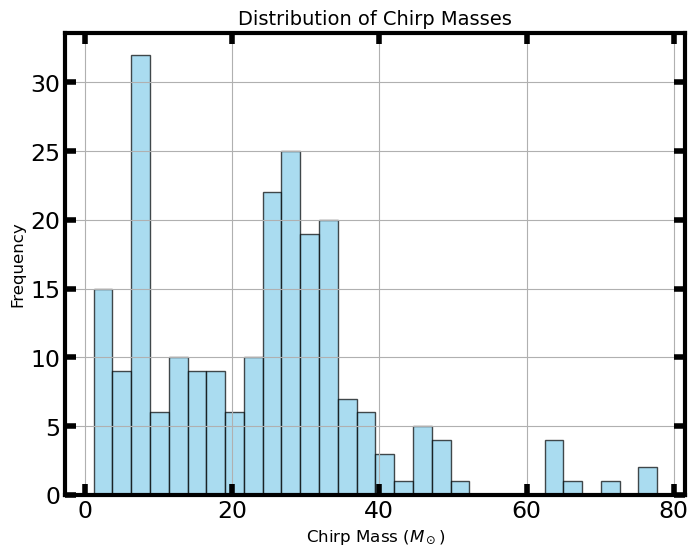

In [16]:
def plot_chirp_mass_distribution(df_events):
    """
    Plot the distribution of chirp masses from the BH_BH_mergers DataFrame.
    """
    # Extract chirp masses
    chirp_masses = df_events['chirp_mass']

    # Plot histogram
    plt.figure(figsize=(8, 6))
    plt.hist(chirp_masses, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

    # Add labels and title
    plt.xlabel('Chirp Mass ($M_\\odot$)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Distribution of Chirp Masses', fontsize=14)
    plt.grid(True)

    # Show the plot
    plt.show()

# Call the function with the BH_BH_mergers DataFrame
plot_chirp_mass_distribution(df_events)

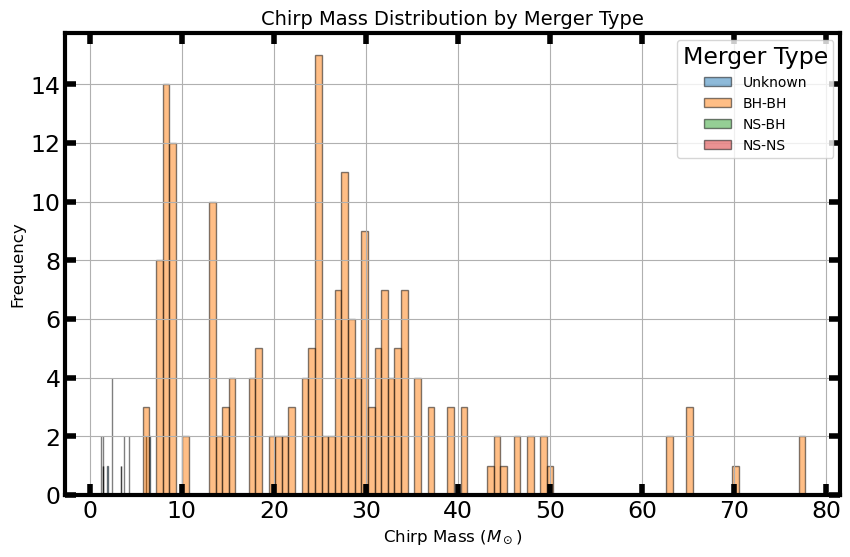

In [17]:
import matplotlib.pyplot as plt

def plot_chirp_mass_by_merger_type(df_events):
    """
    Plot the chirp mass distribution grouped by merger type.
    """
    # Get unique merger types
    merger_types = df_events['merger_type'].unique()

    # Create a figure
    plt.figure(figsize=(10, 6))

    # Loop through each merger type and plot its chirp mass distribution
    for merger_type in merger_types:
        # Filter data for the current merger type
        subset = df_events[df_events['merger_type'] == merger_type]
        chirp_masses = subset['chirp_mass']

        # Plot histogram for the current merger type
        plt.hist(chirp_masses, bins=100, alpha=0.5, label=f'{merger_type}', edgecolor='black')

    # Add labels, title, and legend
    plt.xlabel('Chirp Mass ($M_\\odot$)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Chirp Mass Distribution by Merger Type', fontsize=14)
    plt.legend(title='Merger Type', fontsize=10)
    plt.grid(True)

    # Show the plot
    plt.show()

# Call the function with the df_events DataFrame
plot_chirp_mass_by_merger_type(df_events)

In [18]:
from scipy.constants import c

def energy(data):
    m1 = data['mass_1_source']
    m2 = data['mass_2_source']
    M = m1 + m2
    M_final = data['final_mass_source']

    # Calculate energy using E=mc^2
    energy = (M - M_final) * c**2  # in Joules

    return energy

In [19]:
df_events['energy_released'] = energy(df_events)
print(df_events[['mass_1_source', 'mass_2_source', 'final_mass_source', 'merger_type', 'energy_released']])

     mass_1_source  mass_2_source  final_mass_source merger_type  \
0              3.6            1.4                NaN     Unknown   
1             38.0           11.3               48.0       BH-BH   
2             13.1            7.8               20.2       BH-BH   
3             34.2           27.7               59.0       BH-BH   
4              NaN            NaN                NaN     Unknown   
..             ...            ...                ...         ...   
267           12.1            8.3               19.6       BH-BH   
268           29.0            5.9               34.0       BH-BH   
269           65.0           47.0              107.0       BH-BH   
270           10.7            7.7               17.6       BH-BH   
271           11.8            7.9               19.0       BH-BH   

     energy_released  
0                NaN  
1       1.168382e+17  
2       6.291286e+16  
3       2.606390e+17  
4                NaN  
..               ...  
267     7.190041e+16  

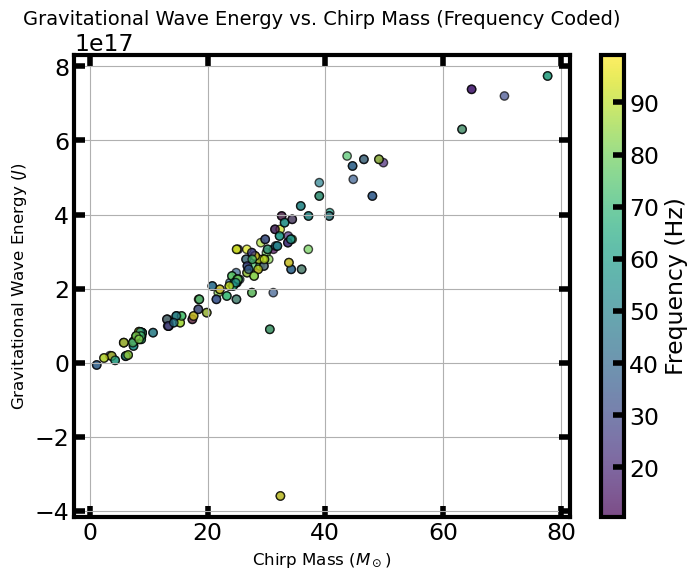

In [20]:

# Speed of light in m/s
c = 3e8

# Calculate chirp mass
df_events['chirp_mass'] = ((df_events['mass_1_source'] * df_events['mass_2_source'])**(3/5)) / \
                          ((df_events['mass_1_source'] + df_events['mass_2_source'])**(1/5))

# Calculate gravitational wave energy (E_GW)
df_events['E_GW'] = (df_events['mass_1_source'] + df_events['mass_2_source'] - df_events['final_mass_source']) * (c**2)

# Generate random frequencies for visualization (replace with actual frequency data if available)
np.random.seed(42)  # For reproducibility
df_events['frequency'] = np.random.uniform(10, 100, len(df_events))  # Example frequency range in Hz

# Plot E_GW vs. chirp mass with frequency as color
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_events['chirp_mass'], df_events['E_GW'], c=df_events['frequency'], cmap='viridis', alpha=0.7, edgecolor='black')
plt.xlabel('Chirp Mass ($M_\\odot$)', fontsize=12)
plt.ylabel('Gravitational Wave Energy ($J$)', fontsize=12)
plt.title('Gravitational Wave Energy vs. Chirp Mass (Frequency Coded)', fontsize=14)
plt.colorbar(scatter, label='Frequency (Hz)')
plt.grid(True)
plt.show()

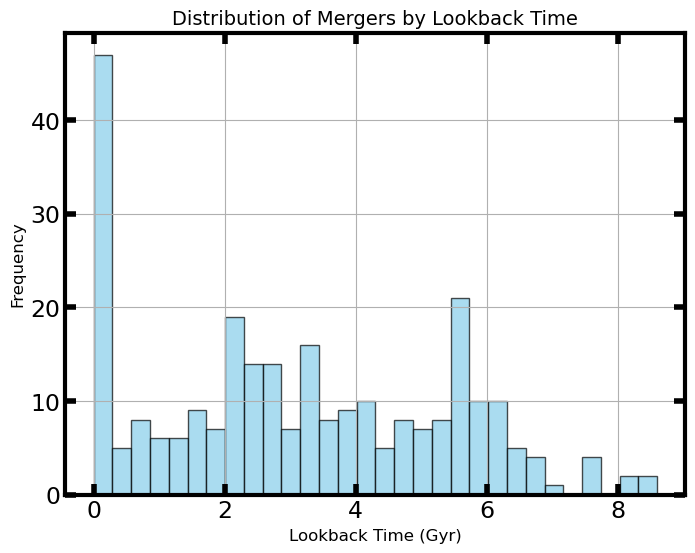

In [21]:
from astropy.cosmology import Planck18 as cosmo

def redshift_to_lookback_time(df_events):
    """
    Add a column for lookback time (in Gyr) to the DataFrame.
    """
    df_events['lookback_time'] = df_events['redshift'].apply(lambda z: cosmo.lookback_time(z).value)
    return df_events

# Add lookback time to the dataset
df_events = redshift_to_lookback_time(df_events)

# Plot lookback time distribution
plt.figure(figsize=(8, 6))
plt.hist(df_events['lookback_time'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Lookback Time (Gyr)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Mergers by Lookback Time', fontsize=14)
plt.grid(True)
plt.show()